In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing dependencies
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

## **Reading the Cleaned Dataset**

In [4]:
df=pd.read_csv("/content/drive/MyDrive/capstone project data/healthcare dataset/Health_care.csv")
df.head(3)

,Product_id,description,title,imUrl,related,salesRank,categories,price,brand,reviewerID,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,B0059IU3TG,Absonutrix Fucoxanthin Topical Thermogenic Sli...,Absonutrix Fucoxanthin Slim Patches - 30 Patch...,http://ecx.images-amazon.com/images/I/614vz80j...,"{'also_bought': ['B0059IAWNI', 'B005FYO4OE', '...",36711,"[['Health & Personal Care', 'Vitamins & Dietar...",15.95,Absonutrix Fucoxanthin Patch,A1L7MPGNGTCDOG,...,2014-02-12,Negative,0,0,0.0,0.000,1.000,0.000,0.0000,20
1,B001AJ6YS2,The fully washable Philips Norelco 7310XL Men'...,Philips Norelco 7310 Men's Shaving System,http://ecx.images-amazon.com/images/I/31kbFfBR...,"{'also_bought': ['B000068PBT', 'B001AJ8YGC', '...",15682,"[['Health & Personal Care', 'Personal Care', '...",79.99,Philips,AM12RRYC66CO1,...,2012-03-11,Negative,0,2,0.0,0.139,0.839,0.022,-0.7896,50
2,B00AYV59WY,NaN,"Scott Extra Soft Bath Tissue Mega Roll, 12 Cou...",http://ecx.images-amazon.com/images/I/51OI%2BI...,"{'also_bought': ['B00HFQ2T06', 'B00BGN8PLG', '...",1517,"[['Health & Personal Care', 'Household Supplie...",23.99,SCOTT,A3CTL2OU26LA5A,...,2013-12-11,Negative,0,1,0.0,0.128,0.872,0.000,-0.6635,54


In [ ]:
df.isnull().sum()

Product_id            0
description       80130
title                 0
imUrl                 0
related               0
salesRank             0
categories            0
price                 0
brand                 4
reviewerID            0
reviewerName         38
reviewText           77
overall               0
summary              10
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

<font color='sienna'> **As we converted the data to csv some empty strings were converted to null values as the number of null values is very less we will drop the values**.

In [9]:
df.drop('description',axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Product_id        0
title             0
imUrl             0
related           0
salesRank         0
categories        0
price             0
brand             0
reviewerID        0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
sentiment         0
Helpful           0
Not_helpful       0
helpful_rate      0
neg               0
neu               0
pos               0
polarity          0
word_count        0
dtype: int64

In [12]:
def overview(df):
    print('\033[1;36mINITIAL DATASET OVERVIEW\033[0m')
    print('\033[1;3m1. Number of records:\033[0m',df.shape[0])
    print(' — — — — -')
    print('\033[1;3m2. Number of features:\033[0m', df.shape[1])
    print(' — — — — -')
    print('\033[1;3m3. Basic overview:\033[0m')
    print(df.info())
    print(' — — — — -')
    print('\033[1;3m4. Statistical summary:\033[0m\n',df.describe())
    print(' — — — — -')
    print('\033[1;3m5. Data types:\033[0m\n', df.dtypes)
    print(' — — — — -')
    print('\033[1;3m6. First 5 records:\033[0m\n',df.head())
    print(' — — — — -')
    print('\033[1;3m7. Last 5 records:\033[0m\n', df.tail())

In [13]:
overview(df)

INITIAL DATASET OVERVIEW
1. Number of records: 567541
 — — — — -
2. Number of features: 24
 — — — — -
3. Basic overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 567541 entries, 0 to 567669
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Product_id      567541 non-null  object 
 1   title           567541 non-null  object 
 2   imUrl           567541 non-null  object 
 3   related         567541 non-null  object 
 4   salesRank       567541 non-null  int64  
 5   categories      567541 non-null  object 
 6   price           567541 non-null  float64
 7   brand           567541 non-null  object 
 8   reviewerID      567541 non-null  object 
 9   reviewerName    567541 non-null  object 
 10  reviewText      567541 non-null  object 
 11  overall         567541 non-null  float64
 12  summary         567541 non-null  object 
 13  unixReviewTime  567541 non-null  int64  
 14  reviewTime      567541 non-

# Logistic Regression with ovr

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import classification_report
import time
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [15]:
X= tfidf_vectorizer.fit_transform(df['reviewText'])
Y =(df['sentiment'])

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y ,random_state=42)

In [19]:
print("X_train n_samples: %d, n_features: %d" % x_train.shape)
print("X_test n_samples: %d, n_features: %d" % x_test.shape)

X_train n_samples: 454032, n_features: 159509
X_test n_samples: 113509, n_features: 159509


In [20]:
t1= time.time()
lr = LogisticRegression(max_iter=200, verbose=1)
ovr = OneVsRestClassifier(lr)

# fit the model on the training data
ovr.fit(x_train, y_train)

 # predictions for test set
y_pred = ovr.predict(x_test)
ttime = round(time.time()-t1, 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


In [21]:
print("Time for modelling",ttime , "secs")

#evaluation metrics

print("\033[1;3m\nclassification_report:\033[0m\n\n",classification_report(y_test,y_pred))

Time for modelling 191.245 secs

classification_report:

               precision    recall  f1-score   support

    Negative       0.75      0.66      0.70     17062
     Neutral       0.48      0.12      0.20      9242
    Positive       0.88      0.97      0.92     87205

    accuracy                           0.85    113509
   macro avg       0.70      0.58      0.61    113509
weighted avg       0.83      0.85      0.83    113509



In [22]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


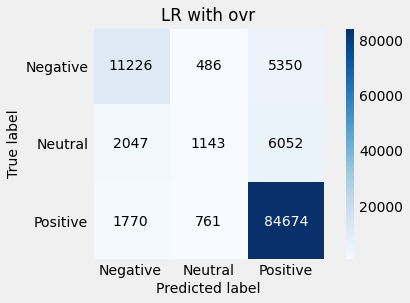

In [23]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = 'LR with ovr')
plt.show()

In [24]:
def user_input(review):
    reviews_new=[review]
    reviews_new_tfidf = tfidf_vectorizer.transform(reviews_new)
    pred = ovr.predict(reviews_new_tfidf)
    return pred

In [25]:
review_input=input("Enter any string to check the sentiment: ")
print(user_input(review_input))

Enter any string to check the sentiment: not good
['Negative']


#Interpretation:

- For classification, we used logistic regression as it is easier to implement, interpret, and very efficient to train.
- The dataset was huge in size so trying ensemble methods was of no use, tried using SVC but it also required more time to run.
- We get accuracy score as 86 % so we can use this model for predicting the sentiments of the customer reviews.